## MATH 151 Lab 7

Put team members' names and section number here.

In [19]:
import sympy as sp
from sympy.plotting import (plot,plot_parametric)

### Question 1

#### 1a

In [20]:
# Enter your code here
t = sp.symbols('t')
n = 16
R = n**2 - t**2 +n*t
B = t**2 + n*(n-t)
print(sp.simplify(R + B))

512


#### 1b

In [21]:
# Enter your code here
D = R - B
sp.pprint(sp.solve(D, t))
sp.pprint(D.subs(t, 8))


[0, 16]
128


#### 1c

In [22]:
# Enter your answer here as either a print statement or comment.
# Since D(8) is positive and the functions remains positive while t is between 0 and 16, there is always more red than blue within the interval.


####1d

In [23]:
# Enter your code here
dB = sp.diff(B, t)
print(dB.subs(t, 0))
# The number of Blue squares at t = 0 is decreasing at a rate of -16 squares over time

-16


####1e

In [24]:
# Enter your code here
#find minimum amount of blue squares
dB = sp.diff(B, t)
critical_points = sp.solve(dB, t)
min_blue = min(B.subs(t, crit) for crit in critical_points)
print(min_blue)

192


### Question 2

#### 2a

In [25]:
x = sp.Symbol('x')
g1 = sp.cos(x)
g2 = x * sp.ln(x + 1) + 1
g3 = sp.sqrt(x - 2) + 1
g = sp.Piecewise((g1, (x >= -1) & (x <= 0)),(g2, (x > 0) & (x < 3)), (g3, (x >= 3) & (x <= 4)))
limit_left_0 = sp.limit(g1, x, 0)
limit_right_0 = sp.limit(g2, x, 0)
cont_0 = sp.simplify(limit_left_0 - limit_right_0)
limit_left_3 = sp.limit(g2, x, 3)
limit_right_3 = sp.limit(g3, x, 3)
cont_3 = sp.simplify(limit_left_3 - limit_right_3)
g2_prime = sp.diff(g2, x)
g3_prime = sp.diff(g3, x)
diff_left_3 = sp.limit(g2_prime, x, 3)
diff_right_3 = sp.limit(g3_prime, x, 3)
diff_3 = sp.simplify(diff_left_3 - diff_right_3)
print("yes, at x = 3")





yes, at x = 3


#### 2b

In [26]:
g_at_4 = g3.subs(x, 4)
g_at_neg1 = g1.subs(x, -1)
avg_rate = (g_at_4 - g_at_neg1) / 5
g_prime = sp.Piecewise((sp.diff(g1, x), (x >= -1) & (x <= 0)),(sp.diff(g2, x), (x > 0) & (x < 3)),(sp.diff(g3, x), (x >= 3) & (x <= 4)))
c1 = sp.nsolve(sp.diff(g1, x) - avg_rate, x, -0.5)
c2 = sp.nsolve(sp.diff(g2, x) - avg_rate, x, 1.5)
c3 = sp.nsolve(sp.diff(g3, x) - avg_rate, x, 3.5)
display(c1,c2,c3)

-0.384161895823078

0.217057538126372

3.77984415766695

#### 2c

In [27]:
crit1 = sp.nsolve(sp.diff(g1, x), x, -0.5)
#there are no critical points for g2 in this interval.
crit2 = None
#there are no critical points for g3 in this interval.
crit3 = None
display(crit1)


0

#### 2d

In [28]:
points = [-1, 0, 3, 4, crit1, crit2, crit3]
valid_points = [pt for pt in points if pt is not None]
values = [g.subs(x, pt).evalf() for pt in valid_points]
g_max = max(values)
g_min = min(values)
display(g_max)
display(g_min)


2.41421356237309

0.540302305868140

#### 2e

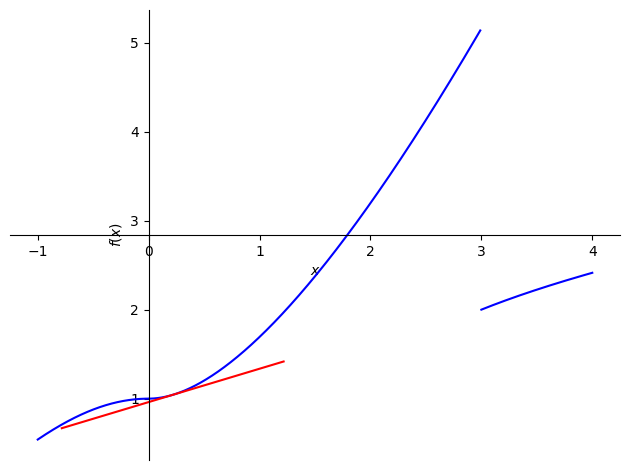

In [29]:
# choose a c-value computed earlier (c1, c2, or c3). Here we use c2 as an example.
c_val = c2

y_at_c = g.subs(x, c_val)
slope_at_c = g_prime.subs(x, c_val)
tangent_line = slope_at_c * (x - c_val) + y_at_c

# convert c_val to a Python float for plotting range/labels
c_float = float(c_val)

p1 = plot(g1, (x, -1, 0), show=False, line_color='blue', label='g(x)')
p2 = plot(g2, (x, 0.01, 2.99), show=False, line_color='blue')  # avoid x=0, x=3
p3 = plot(g3, (x, 3, 4), show=False, line_color='blue')
p_tangent = plot(tangent_line, (x, c_float - 1, c_float + 1), show=False, line_color='red', label='Tangent at x={:.2f}'.format(c_float))
p1.extend(p2)
p1.extend(p3)
p1.extend(p_tangent)
p1.show()
